# Pandas教程

### 2018七月在线 机器学习集训营 julyedu.com
by 褚则伟 zeweichu@gmail.com

pandas是一个专门用于数据分析的python library

## [Pandas](http://pandas.pydata.org/)简介
- python数据分析library
- 基于numpy (对ndarray的操作)
- 有一种用python做Excel/SQL/R的感觉
- 为什么要学习pandas?
- pandas和机器学习的关系，数据预处理，feature engineering。

## 目录
- Series
- DataFrame
- Index
- 文件读写

## 数据结构Series

### 2018七月在线 机器学习集训营 julyedu.com

### 构造和初始化Series

In [11]:
import pandas as pd
import numpy as np

Series是一个一维的数据结构，下面是一些初始化Series的方法。

In [3]:
s = pd.Series([7, 'Beijing', 2.17, -12344, 'Happy Birthday!'])
s

0                  7
1            Beijing
2               2.17
3             -12344
4    Happy Birthday!
dtype: object

pandas会默认用0到n-1来作为Series的index，但是我们也可以自己指定index。index我们可以把它理解为dict里面的key。

In [4]:
s = pd.Series([7, 'Beijing', 2.17, -12344, 'Happy Birthday!'],
             index=['A', 'B', 'C', 'D', 'E'])
s

A                  7
B            Beijing
C               2.17
D             -12344
E    Happy Birthday!
dtype: object

还可以用dictionary来构造一个Series，因为Series本来就是key value pairs。

In [5]:
cities = {'Beijing': 55000, 'Shanghai': 60000, 'Shenzhen': 50000, 'Hangzhou': 20000, 'Guangzhou': 25000, 'Suzhou': None}
# apts = pd.Series(cities)
apts = pd.Series(cities, name="price")
apts

Beijing      55000.0
Guangzhou    25000.0
Hangzhou     20000.0
Shanghai     60000.0
Shenzhen     50000.0
Suzhou           NaN
Name: price, dtype: float64

numpy ndarray构建一个Series

In [6]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a    0.455957
b   -1.052570
c    1.107838
d   -0.319376
e   -0.019927
dtype: float64

### 选择数据

我们可以像对待一个list一样对待Series

In [7]:
apts[[4,3,1]]

Shenzhen     50000.0
Shanghai     60000.0
Guangzhou    25000.0
Name: price, dtype: float64

In [8]:
apts[1:]

Guangzhou    25000.0
Hangzhou     20000.0
Shanghai     60000.0
Shenzhen     50000.0
Suzhou           NaN
Name: price, dtype: float64

In [9]:
apts[:-1]

Beijing      55000.0
Guangzhou    25000.0
Hangzhou     20000.0
Shanghai     60000.0
Shenzhen     50000.0
Name: price, dtype: float64

为什么下面这样会拿到两个NaN呢？

In [10]:
apts[1:] + apts[:-1]

Beijing           NaN
Guangzhou     50000.0
Hangzhou      40000.0
Shanghai     120000.0
Shenzhen     100000.0
Suzhou            NaN
Name: price, dtype: float64

Series就像一个dict，前面定义的index就是用来选择数据的

In [11]:
apts["Hangzhou"]

20000.0

In [12]:
apts[["Hangzhou", "Beijing", "Shenzhen"]]

Hangzhou    20000.0
Beijing     55000.0
Shenzhen    50000.0
Name: price, dtype: float64

In [12]:
"Hangzhou" in apts

True

In [13]:
"Chongqing" in apts

False

比较安全的用key读取value的方法如下

In [14]:
apts.get("Chongqing", 0)

0

下面这种写法，如果key不存在，就可能会报错了

In [15]:
# apts["Chongqing"]

In [16]:
apts.get("Hangzhou", 0)

20000.0

boolean indexing，与numpy类似。

In [17]:
apts[apts < 50000]

Guangzhou    25000.0
Hangzhou     20000.0
Name: price, dtype: float64

In [18]:
apts.median()

50000.0

In [19]:
apts[apts > apts.median()]

Beijing     55000.0
Shanghai    60000.0
Name: price, dtype: float64

下面我再详细展示一下这个boolean indexing是如何工作的

In [20]:
less_than_50000 = apts < 50000
print(less_than_50000)

Beijing      False
Guangzhou     True
Hangzhou      True
Shanghai     False
Shenzhen     False
Suzhou       False
Name: price, dtype: bool


In [21]:
print(apts[less_than_50000])

Guangzhou    25000.0
Hangzhou     20000.0
Name: price, dtype: float64


### Series元素赋值

Series的元素可以被赋值

In [22]:
print("Old value: ", apts['Shenzhen'])
apts['Shenzhen'] = 55000
print("New value: ", apts['Shenzhen'])

Old value:  50000.0
New value:  55000.0


前面讲过的boolean indexing在赋值的时候也可以用

In [23]:
print(apts[apts < 50000])
print()
apts[apts <= 50000] = 40000
print(apts[apts < 50000])

Guangzhou    25000.0
Hangzhou     20000.0
Name: price, dtype: float64

Guangzhou    40000.0
Hangzhou     40000.0
Name: price, dtype: float64


### 数学运算

下面我们来讲一些基本的数学运算。

In [24]:
apts / 2

Beijing      27500.0
Guangzhou    20000.0
Hangzhou     20000.0
Shanghai     30000.0
Shenzhen     27500.0
Suzhou           NaN
Name: price, dtype: float64

In [25]:
apts ** 2

Beijing      3.025000e+09
Guangzhou    1.600000e+09
Hangzhou     1.600000e+09
Shanghai     3.600000e+09
Shenzhen     3.025000e+09
Suzhou                NaN
Name: price, dtype: float64

numpy的运算可以被运用到pandsa上去

In [26]:
np.square(apts)

Beijing      3.025000e+09
Guangzhou    1.600000e+09
Hangzhou     1.600000e+09
Shanghai     3.600000e+09
Shenzhen     3.025000e+09
Suzhou                NaN
Name: price, dtype: float64

我们再定义一个新的Series做加法

In [27]:
cars = pd.Series({'Beijing': 300000, 'Shanghai': 400000, 'Shenzhen': 300000, \
                      'Tianjin': 200000, 'Guangzhou': 200000, 'Chongqing': 150000})
cars

Beijing      300000
Chongqing    150000
Guangzhou    200000
Shanghai     400000
Shenzhen     300000
Tianjin      200000
dtype: int64

In [11]:
print(cars + apts * 100)

Beijing      5800000.0
Chongqing          NaN
Guangzhou    4200000.0
Hangzhou           NaN
Shanghai     6400000.0
Shenzhen     5800000.0
Suzhou             NaN
Tianjin            NaN
dtype: float64


### 数据缺失

[reference](https://pandas.pydata.org/pandas-docs/stable/missing_data.html)

In [28]:
print('Hangzhou' in apts)
print('Hangzhou' in cars)

True
False


In [29]:
apts.notnull()

Beijing       True
Guangzhou     True
Hangzhou      True
Shanghai      True
Shenzhen      True
Suzhou       False
Name: price, dtype: bool

In [30]:
print(apts.isnull())

Beijing      False
Guangzhou    False
Hangzhou     False
Shanghai     False
Shenzhen     False
Suzhou        True
Name: price, dtype: bool


In [31]:
print(apts[apts.isnull()])

Suzhou   NaN
Name: price, dtype: float64


In [32]:
print(apts[apts.isnull() == False])

Beijing      55000.0
Guangzhou    40000.0
Hangzhou     40000.0
Shanghai     60000.0
Shenzhen     55000.0
Name: price, dtype: float64


## 数据结构[Dataframe](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

### 七月在线 julyedu.com

一个Dataframe就是一张表格，Series表示的是一维数组，Dataframe则是一个二维数组，可以类比成一张excel的spreadsheet。也可以把Dataframe当做一组Series的集合。

### 创建一个DataFrame

dataframe可以由一个dictionary构造得到。

In [33]:
data = {'city': ['Beijing', 'Shanghai', 'Guangzhou', 'Shenzhen', 'Hangzhou', 'Chongqing'],
       'year': [2016,2017,2016,2017,2016, 2016],
       'population': [2100, 2300, 1000, 700, 500, 500]}
print(pd.DataFrame(data))

        city  population  year
0    Beijing        2100  2016
1   Shanghai        2300  2017
2  Guangzhou        1000  2016
3   Shenzhen         700  2017
4   Hangzhou         500  2016
5  Chongqing         500  2016


columns的名字和顺序可以指定

In [34]:
print(pd.DataFrame(data, columns=['year', 'city', 'population']))

   year       city  population
0  2016    Beijing        2100
1  2017   Shanghai        2300
2  2016  Guangzhou        1000
3  2017   Shenzhen         700
4  2016   Hangzhou         500
5  2016  Chongqing         500


In [35]:
frame = pd.DataFrame(data, columns = ['year', 'city', 'population', 'debt'],
                     index = ['one', 'two', 'three', 'four', 'five', 'six'])
print(frame)

       year       city  population debt
one    2016    Beijing        2100  NaN
two    2017   Shanghai        2300  NaN
three  2016  Guangzhou        1000  NaN
four   2017   Shenzhen         700  NaN
five   2016   Hangzhou         500  NaN
six    2016  Chongqing         500  NaN


也可以从几个Series构建一个DataFrame

In [36]:
apts

Beijing      55000.0
Guangzhou    40000.0
Hangzhou     40000.0
Shanghai     60000.0
Shenzhen     55000.0
Suzhou           NaN
Name: price, dtype: float64

In [37]:
cars

Beijing      300000
Chongqing    150000
Guangzhou    200000
Shanghai     400000
Shenzhen     300000
Tianjin      200000
dtype: int64

In [38]:
df = pd.DataFrame({"apts": apts, "cars": cars})
df

,apts,cars
Beijing,55000.0,300000.0
Chongqing,NaN,150000.0
Guangzhou,40000.0,200000.0
Hangzhou,40000.0,NaN
Shanghai,60000.0,400000.0
Shenzhen,55000.0,300000.0
Suzhou,NaN,NaN
Tianjin,NaN,200000.0


也可以用一个list of dicts来构建DataFrame

In [39]:
data = [{"July": 999999, "Han": 50000, "Zewei": 1000}, {"July": 99999, "Han": 8000, "Zewei": 200}]
pd.DataFrame(data)

,Han,July,Zewei
0,50000,999999,1000
1,8000,99999,200


In [40]:
pd.DataFrame(data, index=["salary", "bonus"])

,Han,July,Zewei
salary,50000,999999,1000
bonus,8000,99999,200


In [41]:
df["apts"]

Beijing      55000.0
Chongqing        NaN
Guangzhou    40000.0
Hangzhou     40000.0
Shanghai     60000.0
Shenzhen     55000.0
Suzhou           NaN
Tianjin          NaN
Name: apts, dtype: float64

In [45]:
df["total_cost"] = df["apts"]*100 + df["cars"]
df

,apts,cars,total_cost
Beijing,55000.0,300000.0,5800000.0
Chongqing,NaN,150000.0,NaN
Guangzhou,40000.0,200000.0,4200000.0
Hangzhou,40000.0,NaN,NaN
Shanghai,60000.0,400000.0,6400000.0
Shenzhen,55000.0,300000.0,5800000.0
Suzhou,NaN,NaN,NaN
Tianjin,NaN,200000.0,NaN


In [46]:
print(frame['city'])
type(frame['city'])

one        Beijing
two       Shanghai
three    Guangzhou
four      Shenzhen
five      Hangzhou
six      Chongqing
Name: city, dtype: object


pandas.core.series.Series

In [47]:
print(frame.year)
type(frame.year)

one      2016
two      2017
three    2016
four     2017
five     2016
six      2016
Name: year, dtype: int64


pandas.core.series.Series

loc方法可以拿到行

In [49]:
print(frame.loc['three'])
type(frame.loc['three'])

year               2016
city          Guangzhou
population         1000
debt                NaN
Name: three, dtype: object


pandas.core.series.Series

下面这种方法默认用来选列而不是选行

iloc方法可以拿到行和列，把pandas dataframe当做numpy的ndarray来操作

In [50]:
frame.iloc[1]

year              2017
city          Shanghai
population        2300
debt               NaN
Name: two, dtype: object

In [51]:
frame.iloc[1:3, 2:4]

,population,debt
two,2300,NaN
three,1000,NaN


### DataFrame元素赋值

In [52]:
frame["population"]["one"] = 2200

/Users/zeweichu/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
frame.loc["one", "population"] = 2200

可以给一整列赋值

In [60]:
frame['debt'] = 100
print(frame)

       year       city  population  debt
one    2016    Beijing        2200   100
two    2017   Shanghai        2300   100
three  2016  Guangzhou        1000   100
four   2017   Shenzhen         700   100
five   2016   Hangzhou         500   100
six    2016  Chongqing         500   100


In [61]:
frame.loc['six'] = 0
print(frame)

       year       city  population  debt
one    2016    Beijing        2200   100
two    2017   Shanghai        2300   100
three  2016  Guangzhou        1000   100
four   2017   Shenzhen         700   100
five   2016   Hangzhou         500   100
six       0          0           0     0


In [62]:
frame
frame.index
frame['city']

one        Beijing
two       Shanghai
three    Guangzhou
four      Shenzhen
five      Hangzhou
six              0
Name: city, dtype: object

In [63]:
frame.debt = np.arange(6)
print(frame)

       year       city  population  debt
one    2016    Beijing        2200     0
two    2017   Shanghai        2300     1
three  2016  Guangzhou        1000     2
four   2017   Shenzhen         700     3
five   2016   Hangzhou         500     4
six       0          0           0     5


还可以用Series来指定需要修改的index以及相对应的value，没有指定的默认用NaN.

In [64]:
val = pd.Series([100, 200, 300], index=['two', 'three', 'five'])
frame['debt'] = val
print(frame)

       year       city  population   debt
one    2016    Beijing        2200    NaN
two    2017   Shanghai        2300  100.0
three  2016  Guangzhou        1000  200.0
four   2017   Shenzhen         700    NaN
five   2016   Hangzhou         500  300.0
six       0          0           0    NaN


In [65]:
frame['western'] = (frame.city == 'Chongqing')
print(frame)

       year       city  population   debt  western
one    2016    Beijing        2200    NaN    False
two    2017   Shanghai        2300  100.0    False
three  2016  Guangzhou        1000  200.0    False
four   2017   Shenzhen         700    NaN    False
five   2016   Hangzhou         500  300.0    False
six       0          0           0    NaN    False


如果我们想要知道有哪些列，直接用columns

In [66]:
print(frame.columns)

Index(['year', 'city', 'population', 'debt', 'western'], dtype='object')


行的话就叫做index啦

In [67]:
frame.index

Index(['one', 'two', 'three', 'four', 'five', 'six'], dtype='object')

一个DataFrame就和一个numpy 2d array一样，可以被转置

In [68]:
pop = {'Beijing': {2016: 2100, 2017:2200},
      'Shanghai': {2015:2400, 2016:2500, 2017:2600}}

In [69]:
frame2 = pd.DataFrame(pop)
print(frame2)
print(frame2.T)

      Beijing  Shanghai
2015      NaN      2400
2016   2100.0      2500
2017   2200.0      2600
            2015    2016    2017
Beijing      NaN  2100.0  2200.0
Shanghai  2400.0  2500.0  2600.0


指定index的顺序，以及使用切片初始化数据

In [70]:
print(pd.DataFrame(pop, index=[2016,2015,2017]))

      Beijing  Shanghai
2016   2100.0      2500
2015      NaN      2400
2017   2200.0      2600


In [62]:
pdata = {'Beijing': frame2['Beijing'][:-1], 'Shanghai':frame2['Shanghai'][:-1]}
print(pd.DataFrame(pdata))

      Beijing  Shanghai
2015      NaN      2400
2016   2100.0      2500


我们还可以指定index的名字和列的名字

In [71]:
frame2.index.name = 'year'
frame2.columns.name = 'city'
print(frame2)

city  Beijing  Shanghai
year                   
2015      NaN      2400
2016   2100.0      2500
2017   2200.0      2600


In [72]:
print(frame2.values)
print(frame)
print(type(frame.values))

[[   nan  2400.]
 [ 2100.  2500.]
 [ 2200.  2600.]]
       year       city  population   debt  western
one    2016    Beijing        2200    NaN    False
two    2017   Shanghai        2300  100.0    False
three  2016  Guangzhou        1000  200.0    False
four   2017   Shenzhen         700    NaN    False
five   2016   Hangzhou         500  300.0    False
six       0          0           0    NaN    False
<class 'numpy.ndarray'>


In [73]:
df.values

array([[   55000.,   300000.,  5800000.],
       [      nan,   150000.,       nan],
       [   40000.,   200000.,  4200000.],
       [   40000.,       nan,       nan],
       [   60000.,   400000.,  6400000.],
       [   55000.,   300000.,  5800000.],
       [      nan,       nan,       nan],
       [      nan,   200000.,       nan]])

In [74]:
df.as_matrix()

array([[   55000.,   300000.,  5800000.],
       [      nan,   150000.,       nan],
       [   40000.,   200000.,  4200000.],
       [   40000.,       nan,       nan],
       [   60000.,   400000.,  6400000.],
       [   55000.,   300000.,  5800000.],
       [      nan,       nan,       nan],
       [      nan,   200000.,       nan]])

## Index
### 2018七月在线 机器学习集训营  julyedu.com

### index object

In [75]:
obj = pd.Series(range(3), index = ['a', 'b', 'c'])
index = obj.index
print(index)
print(index[1:])

Index(['a', 'b', 'c'], dtype='object')
Index(['b', 'c'], dtype='object')


index的值是不能被更改的

In [76]:
index[1] = 'd'

TypeError: Index does not support mutable operations

In [77]:
index = pd.Index(np.arange(3))
obj2 = pd.Series([2,5,7], index=index)
print(obj2)
print(obj2.index is index)
print(obj2.index is np.arange(3))

0    2
1    5
2    7
dtype: int64
True
False


In [78]:
pop = {'Beijing': {2016: 2100, 2017:2200},
      'Shanghai': {2015:2400, 2016:2500, 2017:2600}}
frame3 = pd.DataFrame(pop)
print('Shanghai' in frame3.columns)
print(2015 in frame3.index)

True
True


### 针对index进行索引和切片

In [79]:
obj = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
print(obj['b'])

1


默认的数字index依旧可以使用

In [80]:
print(obj[3])
print()
print(obj[[1,3]])

3

b    1
d    3
dtype: int64


In [81]:
print(obj[obj<2])

a    0
b    1
dtype: int64


下面介绍如何对Series进行切片

In [82]:
print(obj['b':'c'])
obj['b':'c'] = 5
print(obj)

b    1
c    2
dtype: int64
a    0
b    5
c    5
d    3
dtype: int64


对DataFrame进行Indexing与Series基本相同

In [83]:
frame = pd.DataFrame(np.arange(9).reshape(3,3), 
                    index = ['a', 'c', 'd'],
                    columns = ['Hangzhou', 'Shenzhen', 'Nanjing'])

In [84]:
print(frame)

   Hangzhou  Shenzhen  Nanjing
a         0         1        2
c         3         4        5
d         6         7        8


In [85]:
print(frame['Hangzhou'])

a    0
c    3
d    6
Name: Hangzhou, dtype: int64


In [86]:
print(frame[['Shenzhen', 'Nanjing']])

   Shenzhen  Nanjing
a         1        2
c         4        5
d         7        8


In [87]:
print(frame[:2])

   Hangzhou  Shenzhen  Nanjing
a         0         1        2
c         3         4        5


In [88]:
print(frame.loc['a'])

Hangzhou    0
Shenzhen    1
Nanjing     2
Name: a, dtype: int64


In [89]:
print(frame.loc[['a','d'], ['Shenzhen', 'Nanjing']])

   Shenzhen  Nanjing
a         1        2
d         7        8


In [90]:
print(frame.loc[:'c', 'Hangzhou'])

a    0
c    3
Name: Hangzhou, dtype: int64


DataFrame也可以用condition selection

In [91]:
print(frame[frame.Hangzhou > 1])

   Hangzhou  Shenzhen  Nanjing
c         3         4        5
d         6         7        8


In [92]:
print(frame < 5)

   Hangzhou  Shenzhen  Nanjing
a      True      True     True
c      True      True    False
d     False     False    False


In [93]:
frame[frame < 5] = 0
print(frame)

   Hangzhou  Shenzhen  Nanjing
a         0         0        0
c         0         0        5
d         6         7        8


### [reindex](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html)

把一个Series或者DataFrame按照新的index顺序进行重排

In [94]:
import numpy as np
import pandas as pd

In [95]:
obj = pd.Series([4.5, 7.2, -5.3, 3.2], index=['d', 'b', 'a', 'c'])
print(obj)

d    4.5
b    7.2
a   -5.3
c    3.2
dtype: float64


In [96]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
print(obj2)

a   -5.3
b    7.2
c    3.2
d    4.5
e    NaN
dtype: float64


In [97]:
print(obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value = 0))

a   -5.3
b    7.2
c    3.2
d    4.5
e    0.0
dtype: float64


In [98]:
obj3 = pd.Series(['blue', 'purple', 'yellow'], index = [0,2,4])
print(obj3)

0      blue
2    purple
4    yellow
dtype: object


如果我们reindex的index长度比原来的index长，可以指定方法来fill NaN

In [99]:
print(obj3.reindex(range(6), method='ffill'))

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object


In [100]:
print(obj3.reindex(range(6), method='bfill'))

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object


既然我们可以对Series进行reindex，相应地，我们也可以用同样的方法对DataFrame进行reindex。

In [101]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
print(frame2)

   Hangzhou  Shenzhen  Nanjing
a       0.0       0.0      0.0
b       NaN       NaN      NaN
c       0.0       0.0      5.0
d       6.0       7.0      8.0


在reindex的同时，我们还可以重新指定columns

In [102]:
print(frame.reindex(columns = ['Shenzhen', 'Hangzhou', 'Chongqing']))

   Shenzhen  Hangzhou  Chongqing
a         0         0        NaN
c         0         0        NaN
d         7         6        NaN


In [103]:
print(frame.reindex(index = ['a', 'b', 'c', 'd'],
                    columns = ['Chongqing', 'Hangzhou', 'Shenzhen']))
print(frame.loc[['a', 'b', 'c', 'd'],['Shenzhen', 'Hangzhou', 'Chongqing']])

   Chongqing  Hangzhou  Shenzhen
a        NaN       0.0       0.0
b        NaN       NaN       NaN
c        NaN       0.0       0.0
d        NaN       6.0       7.0
   Shenzhen  Hangzhou  Chongqing
a       0.0       0.0        NaN
b       NaN       NaN        NaN
c       0.0       0.0        NaN
d       7.0       6.0        NaN


下面介绍如何用drop来删除Series和DataFrame中的index，注意drop的效果不是in place的，也就是说他会返回一个object，原来的Obejct并没有被改变

In [104]:
print(obj3)
obj4 = obj3.drop(2)
print(obj4)

0      blue
2    purple
4    yellow
dtype: object
0      blue
4    yellow
dtype: object


In [105]:
print(obj3.drop([2,4]))

0    blue
dtype: object


In [106]:
print(frame)

   Hangzhou  Shenzhen  Nanjing
a         0         0        0
c         0         0        5
d         6         7        8


In [107]:
print(frame.drop(['a', 'c']))

   Hangzhou  Shenzhen  Nanjing
d         6         7        8


drop不仅仅可以删除行，还可以删除列

In [107]:
print(frame.drop('Shenzhen', axis=1))

   Hangzhou  Nanjing
a         0        0
c         0        5
d         6        8


In [108]:
print(frame.drop(['Shenzhen', 'Hangzhou'], axis=1))

   Nanjing
a        0
c        5
d        8


### hierarchical index

In [123]:
import numpy as np
import pandas as pd

Series的hierarchical indexing

In [109]:
data = pd.Series(np.random.randn(10), index=[['a','a','a','b','b','c','c','c','d','d'], [1,2,3,1,2,1,2,3,1,2]])
print(data)

a  1    0.912654
   2   -1.090402
   3   -0.739187
b  1   -0.453764
   2   -1.245328
c  1    1.132151
   2    0.783496
   3   -1.762891
d  1   -0.009484
   2   -0.286843
dtype: float64


In [110]:
print(data.index)

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 2, 2, 2, 3, 3], [0, 1, 2, 0, 1, 0, 1, 2, 0, 1]])


In [111]:
print(data.b)

1   -0.453764
2   -1.245328
dtype: float64


In [112]:
print(data['b':'c'])

b  1   -0.453764
   2   -1.245328
c  1    1.132151
   2    0.783496
   3   -1.762891
dtype: float64


In [113]:
print(data[:2])

a  1    0.912654
   2   -1.090402
dtype: float64


unstack和stack可以帮助我们在hierarchical indexing和DataFrame之间进行切换。

In [114]:
print(data.unstack())
print(type(data.unstack()))

          1         2         3
a  0.912654 -1.090402 -0.739187
b -0.453764 -1.245328       NaN
c  1.132151  0.783496 -1.762891
d -0.009484 -0.286843       NaN
<class 'pandas.core.frame.DataFrame'>


In [115]:
print(data.unstack().stack())
print(type(data.unstack().stack()))

a  1    0.912654
   2   -1.090402
   3   -0.739187
b  1   -0.453764
   2   -1.245328
c  1    1.132151
   2    0.783496
   3   -1.762891
d  1   -0.009484
   2   -0.286843
dtype: float64
<class 'pandas.core.series.Series'>


DataFrame的hierarchical indexing

In [116]:
frame = pd.DataFrame(np.arange(12).reshape((4,3)),
                    index = [['a','a','b','b'], [1,2,1,2]],
                    columns = [['Beijing', 'Beijing', 'Shanghai'], ['apts', 'cars', 'apts']])
print(frame)

    Beijing      Shanghai
       apts cars     apts
a 1       0    1        2
  2       3    4        5
b 1       6    7        8
  2       9   10       11


In [117]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['city', 'type']
print(frame)

city      Beijing      Shanghai
type         apts cars     apts
key1 key2                      
a    1          0    1        2
     2          3    4        5
b    1          6    7        8
     2          9   10       11


In [118]:
print(frame.loc['a', 1])
print(type(frame.loc['a', 1]))

city      type
Beijing   apts    0
          cars    1
Shanghai  apts    2
Name: (a, 1), dtype: int64
<class 'pandas.core.series.Series'>


In [119]:
print(frame.loc['a', 2]['Beijing'])

type
apts    3
cars    4
Name: (a, 2), dtype: int64


In [120]:
print(frame.loc['a', 2]['Beijing']['apts'])

3


In [121]:
print(frame.loc['a'])

city Beijing      Shanghai
type    apts cars     apts
key2                      
1          0    1        2
2          3    4        5


### 2018七月在线 机器学习集训营 julyedu.com
by 褚则伟 zeweichu@gmail.com

## csv文件读写

- [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [to_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html)

In [122]:
goog = pd.read_csv("data/GOOG.csv")
goog.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [123]:
goog = pd.read_csv("data/GOOG.csv", index_col=0)
print(goog.head())
goog.index

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2004-08-19  49.813286  51.835709  47.800831  49.982655  49.982655  44871300
2004-08-20  50.316402  54.336334  50.062355  53.952770  53.952770  22942800
2004-08-23  55.168217  56.528118  54.321388  54.495735  54.495735  18342800
2004-08-24  55.412300  55.591629  51.591621  52.239193  52.239193  15319700
2004-08-25  52.284027  53.798351  51.746044  52.802086  52.802086   9232100


Index(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24', '2004-08-25',
       '2004-08-26', '2004-08-27', '2004-08-30', '2004-08-31', '2004-09-01',
       ...
       '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
       '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19', '2017-07-20'],
      dtype='object', name='Date', length=3253)

In [124]:
goog = goog.reindex(pd.to_datetime(goog.index))
goog.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20'],
              dtype='datetime64[ns]', name='Date', length=3253, freq=None)

In [125]:
goog = pd.read_csv("data/GOOG.csv", index_col=0, parse_dates=[0])
goog.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20'],
              dtype='datetime64[ns]', name='Date', length=3253, freq=None)

In [126]:
goog.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [127]:
goog.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-07-14,952.000000,956.909973,948.005005,955.989990,955.989990,1053800
2017-07-17,957.000000,960.739990,949.241028,953.419983,953.419983,1165500
2017-07-18,953.000000,968.039978,950.599976,965.400024,965.400024,1154000
2017-07-19,967.840027,973.039978,964.030029,970.890015,970.890015,1224500
2017-07-20,975.000000,975.900024,961.510010,968.150024,968.150024,1616500


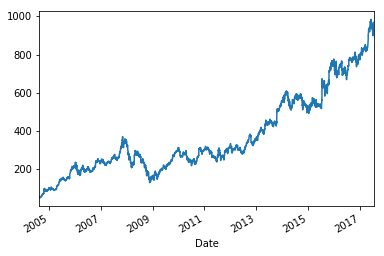

In [128]:
%matplotlib inline
goog["Adj Close"].plot()

In [129]:
df = pd.DataFrame(np.random.rand(10, 4), columns=list("abcd"))
df

,a,b,c,d
0,0.670623,0.647073,0.351004,0.315974
1,0.374384,0.387970,0.026531,0.274550
2,0.523324,0.579698,0.302314,0.893429
3,0.731633,0.042262,0.398653,0.556689
4,0.913807,0.815283,0.306922,0.868985
5,0.442696,0.666117,0.864031,0.620197
6,0.661573,0.003557,0.518327,0.256502
7,0.590883,0.993624,0.387519,0.072710
8,0.832897,0.310703,0.866152,0.835118
9,0.475983,0.402528,0.272328,0.437784


In [130]:
df.to_csv("data/sample.tsv", sep="\t")

## 作业

- 构建三个Series，分别是一系列商品的单价，计量单位，和数量。至于是什么商品什么计量单位由大家自己决定。

In [40]:
price = pd.Series([20, 2, 3, 50, 40],
             index=["Apple", "Banana", "Orange", "Watermelon", "Strawberry"])
unit = pd.Series(["kg", "each", "each", "each", "kg"],
             index=["Apple", "Banana", "Orange", "Watermelon", "Strawberry"])
amount = pd.Series([5, 10, 6, 1, 2],
             index=["Apple", "Banana", "Orange", "Watermelon", "Strawberry"])

- 然后把这三个Series合并成一个DataFrame。

In [41]:
fruit_df = pd.DataFrame({"price": price, "unit": unit, "amount": amount}, columns=["price", "unit", "amount"])
fruit_df

,price,unit,amount
Apple,20,kg,5
Banana,2,each,10
Orange,3,each,6
Watermelon,50,each,1
Strawberry,40,kg,2


- 请同学们自行从yahoo finance下载一些股票数据，然后用read_csv载入并作出折线图

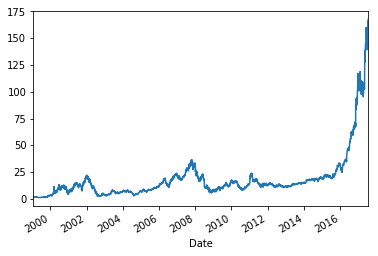

In [126]:
nvda = pd.read_csv("data/NVDA.csv", index_col=0, parse_dates=[0])
nvda["Adj Close"].plot()

- data文件夹下有个文件叫做titanic.csv ，这个文件包含了在titanic事件中乘客的存货情况。请把这个文件读入成一个pandas dataframe

In [143]:
df = pd.read_csv("data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 把每一列中的sex，sex为male的都改成1，sex为female的改成0

In [144]:
df.loc[df["Sex"] == "male", ["Sex"]] = 1
df.loc[df["Sex"] == "female", ["Sex"]] = 0
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


- 把Cabin中的NaN都填充成0 (使用fillna方法)

In [149]:
df.loc[:, "Cabin"] = df.loc[:, "Cabin"].fillna(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S


- 现在我们想把乘客按照年龄做一个分类，年龄在0-11岁的为0类，12-22为1类，23-33为2类，34-44为3类，45-55为4类，56-66为5类，其余为6类，请做把Age改成乘客的年龄类别，如果年龄有缺失，就放入乘客的平均年龄

In [153]:
df.loc[df["Age"].isnull(), "Age"] = df["Age"].mean()
df['Age'] = df['Age'].astype(int)
df.loc[ df['Age'] <= 11, 'Age'] = 0
df.loc[(df['Age'] > 11) & (df['Age'] <= 22), 'Age'] = 1
df.loc[(df['Age'] > 22) & (df['Age'] <= 33), 'Age'] = 2
df.loc[(df['Age'] > 33) & (df['Age'] <= 44), 'Age'] = 3
df.loc[(df['Age'] > 44) & (df['Age'] <= 55), 'Age'] = 4
df.loc[(df['Age'] > 55) & (df['Age'] <= 66), 'Age'] = 5
df.loc[ df['Age'] > 66, 'Age'] = 6

In [154]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0,0,0,373450,8.0500,0,S


我们前面做的这一系列操作都属于数据预处理的范畴。在做实际machine learning问题的时候，很多时候我们都需要对数据进行预处理操作，方便后续的建模。